### Kaggle Link

https://www.kaggle.com/c/jigsaw-toxic-comment-classification-challenge

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
train_df = pd.read_csv('../Data/Kaggle/toxic_train.csv')
test_df  = pd.read_csv('../Data/Kaggle/toxic_test.csv')

In [3]:
train_df.head()

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,22256635,"Nonsense? kiss off, geek. what I said is true...",1,0,0,0,0,0
1,27450690,"""\n\n Please do not vandalize pages, as you di...",0,0,0,0,0,0
2,54037174,"""\n\n """"Points of interest"""" \n\nI removed the...",0,0,0,0,0,0
3,77493077,Asking some his nationality is a Racial offenc...,0,0,0,0,0,0
4,79357270,The reader here is not going by my say so for ...,0,0,0,0,0,0


### Pre-Processing

In [4]:
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize 
from nltk.stem import SnowballStemmer

In [5]:
stop_words = set(stopwords.words('english'))
stemmer = SnowballStemmer('english')

In [6]:
for df in [train_df, test_df]:
    df['comment_text'] = df['comment_text'].apply(lambda x: str(x).lower())
    # df['parsed'] = df['comment_text'].apply(lambda x: word_tokenize(x))
    # df['parsed'] = df['comment_text'].apply(lambda x: [word for word in str(x).split() if word not in stop_words])
    # df['parsed'] = df['parsed'].apply(lambda x: [stemmer.stem(word) for word in x])
    # df['parsed'] = df['parsed'].apply(lambda x: ' '.join(x))

### Feature Engineering 

In [7]:
import re

for df in [train_df, test_df]:
    df['len'] = df['comment_text'].apply(lambda x: len(str(x)))
    df['number'] = df['comment_text'].apply(lambda x: len(re.sub(r'\D+', '', str(x))))
    df['non-word'] = df['comment_text'].apply(lambda x: len(re.sub(r'\w+', '', str(x))))

In [8]:
train_df.head()

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate,len,number,non-word
0,22256635,"nonsense? kiss off, geek. what i said is true...",1,0,0,0,0,0,83,0,21
1,27450690,"""\n\n please do not vandalize pages, as you di...",0,0,0,0,0,0,142,0,41
2,54037174,"""\n\n """"points of interest"""" \n\ni removed the...",0,0,0,0,0,0,411,2,101
3,77493077,asking some his nationality is a racial offenc...,0,0,0,0,0,0,148,0,29
4,79357270,the reader here is not going by my say so for ...,0,0,0,0,0,0,266,0,51


### Exploratory Analysis

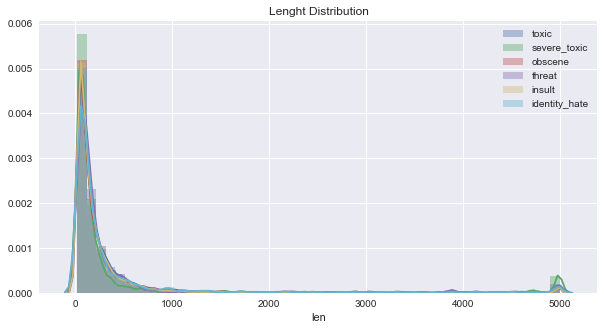

In [9]:
plt.figure(figsize=(10, 5))
s1 = train_df[train_df['toxic'] == 1]['len']
sns.distplot(s1, label='toxic')
s2 = train_df[train_df['severe_toxic'] == 1]['len']
sns.distplot(s2, label='severe_toxic')
s3 = train_df[train_df['obscene'] == 1]['len']
sns.distplot(s3, label='obscene')
s4 = train_df[train_df['threat'] == 1]['len']
sns.distplot(s4, label='threat')
s5 = train_df[train_df['insult'] == 1]['len']
sns.distplot(s5, label='insult')
s6 = train_df[train_df['identity_hate'] == 1]['len']
sns.distplot(s6, label='identity_hate')
plt.title('Lenght Distribution')
plt.legend()

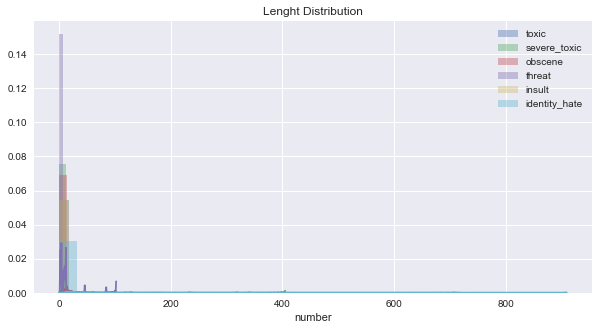

In [10]:
plt.figure(figsize=(10, 5))
s1 = train_df[train_df['toxic'] == 1]['number']
sns.distplot(s1, label='toxic')
s2 = train_df[train_df['severe_toxic'] == 1]['number']
sns.distplot(s2, label='severe_toxic')
s3 = train_df[train_df['obscene'] == 1]['number']
sns.distplot(s3, label='obscene')
s4 = train_df[train_df['threat'] == 1]['number']
sns.distplot(s4, label='threat')
s5 = train_df[train_df['insult'] == 1]['number']
sns.distplot(s5, label='insult')
s6 = train_df[train_df['identity_hate'] == 1]['number']
sns.distplot(s6, label='identity_hate')
plt.title('Lenght Distribution')
plt.legend()

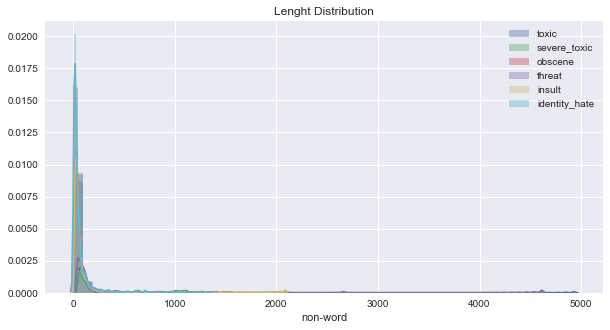

In [11]:
plt.figure(figsize=(10, 5))
s1 = train_df[train_df['toxic'] == 1]['non-word']
sns.distplot(s1, label='toxic')
s2 = train_df[train_df['severe_toxic'] == 1]['non-word']
sns.distplot(s2, label='severe_toxic')
s3 = train_df[train_df['obscene'] == 1]['non-word']
sns.distplot(s3, label='obscene')
s4 = train_df[train_df['threat'] == 1]['non-word']
sns.distplot(s4, label='threat')
s5 = train_df[train_df['insult'] == 1]['non-word']
sns.distplot(s5, label='insult')
s6 = train_df[train_df['identity_hate'] == 1]['non-word']
sns.distplot(s6, label='identity_hate')
plt.title('Lenght Distribution')
plt.legend()

### Modeling

In [12]:
classes = ["toxic", "severe_toxic", "obscene", "threat", "insult", "identity_hate"]

features = train_df.columns.difference(classes)
train_df["comment_text"].fillna("unknown", inplace=True)
test_df["comment_text"].fillna("unknown", inplace=True)

x_train = train_df[features].drop('id', axis=1)
x_test  = test_df[features].drop('id', axis=1)
y_train = train_df[classes]

In [13]:
x_train.head()

,comment_text,len,non-word,number
0,"nonsense? kiss off, geek. what i said is true...",83,21,0
1,"""\n\n please do not vandalize pages, as you di...",142,41,0
2,"""\n\n """"points of interest"""" \n\ni removed the...",411,101,2
3,asking some his nationality is a racial offenc...,148,29,0
4,the reader here is not going by my say so for ...,266,51,0


In [14]:
y_train.head()

,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,1,0,0,0,0,0
1,0,0,0,0,0,0
2,0,0,0,0,0,0
3,0,0,0,0,0,0
4,0,0,0,0,0,0


#### TfidfVectorizer

In [15]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [16]:
vect = TfidfVectorizer(decode_error='ignore', use_idf=True, smooth_idf=True, min_df=15,
                       ngram_range=(1,3), lowercase=True, stop_words='english')

X_train_vectorized = vect.fit_transform(x_train['comment_text'])
X_test_vectorized = vect.transform(x_test['comment_text'])

In [17]:
print('Vocabulary len:', len(vect.get_feature_names()))
print('Longest word:', max(vect.vocabulary_, key=len))

Vocabulary len: 26449
Longest word: wikipedia administrators 27_noticeboard


In [18]:
X_train_vectorized.shape

(95851, 26449)

In [19]:
def add_feature(X, feature_to_add):
    """
    Returns sparse feature matrix with added feature.
    feature_to_add can also be a list of features.
    """
    from scipy.sparse import csr_matrix, hstack
    return hstack([X, csr_matrix(feature_to_add).T], 'csr')

In [20]:
# X_train_vectorized = add_feature(X_train_vectorized, x_train['len'])
# X_train_vectorized = add_feature(X_train_vectorized, x_train['non-word'])
# X_train_vectorized = add_feature(X_train_vectorized, x_train['number'])

In [21]:
# X_test_vectorized = add_feature(X_test_vectorized, x_test['len'])
# X_test_vectorized = add_feature(X_test_vectorized, x_test['non-word'])
# X_test_vectorized = add_feature(X_test_vectorized, x_test['number'])

In [22]:
from sklearn.linear_model import LogisticRegression

In [23]:
from sklearn.metrics import log_loss

In [24]:
y_pred = np.zeros((test_df.shape[0], len(classes)))

loss = []
for i, j in enumerate(classes):
    model = LogisticRegression(C=4)
    model.fit(X_train_vectorized, y_train[j])
    y_pred[:,i] = model.predict_proba(X_test_vectorized)[:,1]
    y_check = model.predict_proba(X_train_vectorized)[:,1]
    loss.append(log_loss(y_train[j], y_check))
    
np.mean(loss)

0.035707575914917015

In [25]:
y_df = pd.DataFrame(y_pred, columns=classes)
submission = pd.concat([test_df['id'], y_df], axis=1)
submission.to_csv('count_vect.csv', index=False)

#### LSTM

In [26]:
from keras.models import Model
from keras.layers import Dense, Embedding, Input
from keras.layers import LSTM, Bidirectional, GlobalMaxPool1D, Dropout
from keras.preprocessing import text, sequence
from keras.callbacks import EarlyStopping, Callback
import keras.backend as K

Using TensorFlow backend.


In [27]:
from IPython.display import clear_output

class PlotLosses(Callback):
    def on_train_begin(self, logs={}):
        self.i = 0
        self.x = []
        self.losses = []
        self.val_losses = []
        
        self.fig = plt.figure()
        
        self.logs = []

    def on_epoch_end(self, epoch, logs={}):
        
        self.logs.append(logs)
        self.x.append(self.i)
        self.losses.append(logs.get('loss'))
        self.val_losses.append(logs.get('val_loss'))
        self.i += 1
        
        clear_output(wait=True)
        plt.figure(figsize=(10, 5))
        plt.plot(self.x, self.losses, label='loss')
        plt.plot(self.x, self.val_losses, label='val_loss')
        plt.legend()
        plt.show();
        
plot_losses = PlotLosses()

In [28]:
x_train['comment_text'].str.len().mean()

395.3420934575539

In [29]:
x_test['comment_text'].str.len().mean()

473.7806544551053

In [30]:
max_features = 20000
maxlen = 256

In [31]:
tokenizer = text.Tokenizer(num_words=max_features)
tokenizer.fit_on_texts(list(x_train['comment_text']))

X_train = tokenizer.texts_to_sequences(x_train['comment_text'])
X_test  = tokenizer.texts_to_sequences(x_test['comment_text'])
X_train = sequence.pad_sequences(X_train, maxlen=maxlen)
X_test  = sequence.pad_sequences(X_test,  maxlen=maxlen)

In [32]:
def get_model():
    embed_size = 128
    inp = Input(shape=(maxlen, ))
    x = Embedding(max_features, embed_size)(inp)
    x = Bidirectional(LSTM(50, return_sequences=True))(x)
    x = GlobalMaxPool1D()(x)
    x = Dropout(0.3)(x)
    x = Dense(50, activation="relu")(x)
    x = Dropout(0.3)(x)
    x = Dense(6, activation="sigmoid")(x)
    model = Model(inputs=inp, outputs=x)
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

    return model

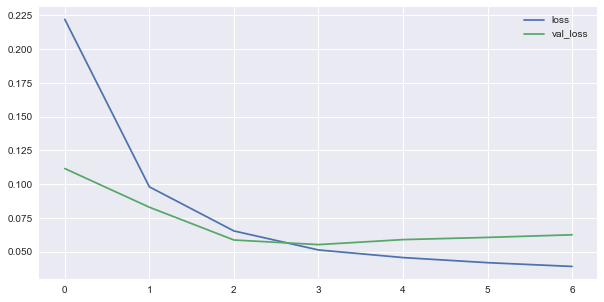

67095/67095 [==============================] - 55964s - loss: 0.0392 - acc: 0.9851 - val_loss: 0.0626 - val_acc: 0.9807


In [33]:
early_stopping = EarlyStopping(monitor='val_loss', patience=2)
BATCH_SIZE = 512
epochs = 20

model = get_model()
model.fit(X_train, y_train.values, epochs=epochs, batch_size=BATCH_SIZE, validation_split=0.3, 
          verbose=1, callbacks=[plot_losses, early_stopping])

In [34]:
y_pred = model.predict(X_test)

In [35]:
y_df = pd.DataFrame(y_pred, columns=classes)
submission = pd.concat([test_df['id'], y_df], axis=1)
submission.to_csv('lstm.csv', index=False)